# Test file for budget system package

## 1. Test code for budget_system class

In [1]:
import sys
sys.path.append(".")

In [2]:
from budget_system.budget_system import initialization
import budget_system
from budget_system.member.member_type import dependant, guardian

Please run the code in the below chunk if you wish to initialize the system with the code instead of calling the class directly

In [3]:
# first time user
#system=initialization()

In [4]:
#load in data
system = budget_system.BudgetSystem(
    current_fund=5000,
    address="UBCO Campus",
    household_name="Test Family"
)
def load_test_fund_data(system):

    print("Loading simplified fund logs (May–July 2025)...")

    # ======================
    #        MAY 2025
    # ======================
    system.add_fund(300, "Salary", "2025-05-01")
    system.add_fund(300, "Salary", "2025-05-02")
    system.sub_fund(120, "Grocery", "2025-05-03")
    system.sub_fund(60, "Dining", "2025-05-05")
    system.sub_fund(85, "Bills", "2025-05-10")        # utilities
    system.sub_fund(40, "Transport", "2025-05-15")    # bus, gas
    system.sub_fund(100, "Shopping", "2025-05-20")
    system.sub_fund(1300, "Bills", "2025-05-25")      # rent
    system.add_fund(120, "Refund", "2025-05-28")

    # ======================
    #        JUNE 2025
    # ======================
    system.add_fund(700, "Salary", "2025-06-01")
    system.add_fund(150, "Bonus", "2025-06-02")
    system.sub_fund(150, "Grocery", "2025-06-04")
    system.sub_fund(70, "Dining", "2025-06-06")
    system.sub_fund(95, "Bills", "2025-06-08")        # internet
    system.sub_fund(45, "Transport", "2025-06-12")
    system.sub_fund(160, "Shopping", "2025-06-18")
    system.sub_fund(1300, "Bills", "2025-06-28")      # rent
    system.sub_fund(9999, "Bills (Fail Test)", "2025-06-01")

    # ======================
    #       JULY 2025
    # ======================
    system.add_fund(700, "Salary", "2025-07-01")
    system.add_fund(200, "Bonus", "2025-07-07")
    system.sub_fund(180, "Grocery", "2025-07-02")
    system.sub_fund(90, "Dining", "2025-07-10")
    system.sub_fund(105, "Bills", "2025-07-15")        # electricity
    system.sub_fund(55, "Transport", "2025-07-18")
    system.sub_fund(140, "Shopping", "2025-07-20")
    system.sub_fund(1300, "Bills", "2025-07-28")       # rent

    print("Simplified fund logs loaded.\n")
load_test_fund_data(system)
m1 = guardian("Alice", "G01", "1990-03-02", 8000, "Engineer")
m2 = dependant("Bob", "D01", "2012-09-10")
m3 = guardian("Charlie", "G02", "1985-04-15",90000, "Engineer")
m4 = dependant("David", "D02", "2010-11-03")
system.add_member(m1)
system.add_member(m2)
system.add_member(m3)
system.add_member(m4)
test_assets = [
        ("House A", "Real Estate", 850000, "G01"),
        ("House B", "Real Estate", 620000, "G02"),
        ("Car A", "Vehicle", 30000, "G01"),
        ("Car B", "Vehicle", 18000, "G02"),
        ("TFSA Investment", "Investment", 12000, "G01"),
        ("RRSP Account", "Investment", 45000, "G01"),
        ("Crypto Wallet", "Investment", 8000, "G02"),
        ("Laptop", "Other", 1500, "D01"),
        ("Camera", "Other", 2300, "D02"),
        ("Motorcycle", "Vehicle", 9000, "G02"),
    ]

for name, t, value, owner_id in test_assets:
    system.add_asset_for_member(
        member_id=owner_id,
        name=name,
        asset_type=t,
        current_value=value,
        date_acquired=None,
    )

Loading simplified fund logs (May–July 2025)...
Simplified fund logs loaded.

Asset added: House A (ID: A001R)
Asset added: House B (ID: A002R)
Asset added: Car A (ID: A003V)
Asset added: Car B (ID: A004V)
Asset added: TFSA Investment (ID: A005I)
Asset added: RRSP Account (ID: A006I)
Asset added: Crypto Wallet (ID: A007I)
Asset added: Laptop (ID: A008O)
Asset added: Camera (ID: A009O)
Asset added: Motorcycle (ID: A010V)


In [16]:
#old user
system=initialization(system)

Thank you for using the system. Goodbye!


## 2. Test code for member subpackage

In [22]:
from budget_system.member.member import member
from budget_system.member.member_type import dependant, guardian, member_edit

print("===== Testing member base class =====")
m = member("Alice", "M001", "2000-01-01")
print("Original:", m.name, m.ID, m.DOB)

m.new_name("Alice New")
m.new_ID("M001-NEW")
m.new_DOB("2001-02-02")

print("Updated:", m.name, m.ID, m.DOB)
print()


print("===== Testing dependant =====")
d = dependant("Child", "D001", "2015-01-01")
print("Original:", d)

d.new_name("Child New")
d.new_DOB("2016-02-02")
d.new_ID("D001-X")

print("Updated:", d)
print()


print("===== Testing guardian =====")
g = guardian("Parent", "G001", "1980-01-01", income=50000, job_title="Teacher")
print("Original:", g)

g.new_name("Parent New")
g.new_DOB("1981-03-03")
g.new_income(75000)
g.new_job("Engineer")

print("Updated:", g)
print()

===== Testing member base class =====
Original: Alice M001 2000-01-01
Updated: Alice New M001-NEW 2001-02-02

===== Testing dependant =====
Original: Child (ID: D001, Dependant)
Updated: Child New (ID: D001-X, Dependant)

===== Testing guardian =====
Original: Parent (ID: G001, Guardian, Income: 50000, Job: Teacher)
Updated: Parent New (ID: G001, Guardian, Income: 75000, Job: Engineer)



In [24]:
print("===== Create a guardian =====")
g = guardian("Test Parent", "PA001", "1980-01-01", income=60000, job_title="Nurse")
print("Before edit:", g)

print("\n--- Now editing this guardian ---")
member_edit(g)

print("\nAfter edit:", g)

===== Create a guardian =====
Before edit: Test Parent (ID: PA001, Guardian, Income: 60000, Job: Nurse)

--- Now editing this guardian ---
Current member type: guardian

--- Member Editor ---
1. Edit name
2. Edit date of birth (DOB)
3. Edit job
4. Edit income
5. Exit editor


Please select the information to edit (1-5):  3
Please enter a new job:  j
Please enter the new income associated with this job:  32


Job and income have been updated.

--- Member Editor ---
1. Edit name
2. Edit date of birth (DOB)
3. Edit job
4. Edit income
5. Exit editor


Please select the information to edit (1-5):  5


Exiting member editor.

After edit: Test Parent (ID: PA001, Guardian, Income: 32.0, Job: j)


## 3. Test code for budgetfund subpackage

===== Create a new budget fund =====
Initial balance: 1000.0

===== Add fund =====
After adding 200: 1200.0

===== Sub fund (succeed) =====
After spending 150: 1050.0

===== Sub fund (fail: insufficient balance) =====
After failed attempt: 1050.0

===== Print DataFrame log =====
  action  amount   description  balance     status       date year_month
0    add     200        Salary   1200.0  succeeded 2025-12-01    2025-12
1    sub     150     Groceries   1050.0  succeeded 2025-12-01    2025-12
2    sub   50000  Car Purchase   1050.0     failed 2025-12-01    2025-12

===== Validate function =====
Validate amount 100: True
Validate amount 999999: False

===== Print full log using fund_utils =====


,action,amount,description,balance,status,date,year_month
0,add,200,Salary,1200.000000,succeeded,2025-12-01 00:00:00,2025-12
1,sub,150,Groceries,1050.000000,succeeded,2025-12-01 00:00:00,2025-12
2,sub,50000,Car Purchase,1050.000000,failed,2025-12-01 00:00:00,2025-12



===== Search log with keyword 'Groceries' =====


,action,amount,description,balance,status,date,year_month
1,sub,150,Groceries,1050.000000,succeeded,2025-12-01 00:00:00,2025-12



===== Filter only succeeded records =====


,action,amount,description,balance,status,date,year_month
0,add,200,Salary,1200.000000,succeeded,2025-12-01 00:00:00,2025-12
1,sub,150,Groceries,1050.000000,succeeded,2025-12-01 00:00:00,2025-12



===== Try monthly summary plot =====


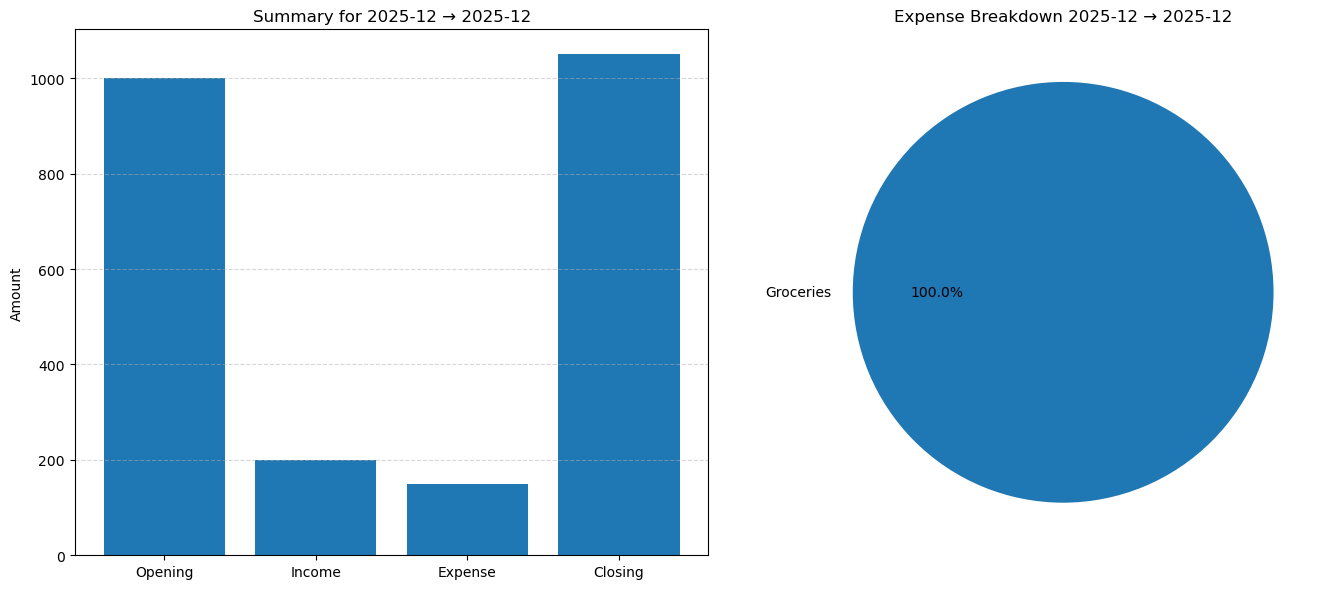

In [26]:
from budget_system.budgetfund.budgetfund import budgetfund
from budget_system.budgetfund.fund_utils import print_log, search_log, filter_status


print("===== Create a new budget fund =====")
bf = budgetfund(opening_balance=1000, name="Test Family")
print("Initial balance:", bf.get())
print()


print("===== Add fund =====")
bf.add(200, "Salary")
print("After adding 200:", bf.get())
print()


print("===== Sub fund (succeed) =====")
bf.sub(150, "Groceries")
print("After spending 150:", bf.get())
print()


print("===== Sub fund (fail: insufficient balance) =====")
bf.sub(50000, "Car Purchase")
print("After failed attempt:", bf.get())
print()


print("===== Print DataFrame log =====")
df = bf.get_df()
print(df)
print()


print("===== Validate function =====")
print("Validate amount 100:", bf.validate(100))     # True
print("Validate amount 999999:", bf.validate(999999))  # False
print()


print("===== Print full log using fund_utils =====")
print_log(bf, None, None)
print()


print("===== Search log with keyword 'Groceries' =====")
search_log(bf, "Groceries")
print()


print("===== Filter only succeeded records =====")
filter_status(bf, True)
print()


print("===== Try monthly summary plot =====")
bf.summarize_month("2025-12")

## 4. Test code for property subpackage

===== Create PropertyRegistry =====
Registry initialized.

===== Add some assets =====
Asset added: Family Home (ID: A015R)
Asset added: Toyota Camry (ID: A016V)
Asset added: Index Fund (ID: A017I)
Assets added:
Asset(ID=A015R, Name='Family Home', Type='Real Estate', 
Asset(ID=A016V, Name='Toyota Camry', Type='Vehicle', 
Asset(ID=A017I, Name='Index Fund', Type='Investment', 

===== Update asset value =====
Value updated: A016V → 18000
Updated: Asset(ID=A016V, Name='Toyota Camry', Type='Vehicle', 

===== Delete an asset =====
Asset deleted: Index Fund (ID: A017I)
Remaining:
Asset(ID=A015R, Name='Family Home', Type='Real Estate', 
Asset(ID=A016V, Name='Toyota Camry', Type='Vehicle', 

===== Convert to DataFrame =====
  Asset ID          Name         Type Owner   Value Date Acquired  \
0    A015R   Family Home  Real Estate  P001  500000    2010-05-01   
1    A016V  Toyota Camry      Vehicle  P002   18000    2018-08-15   

          Last Updated Value_Display  
0  2025-12-01 03:09:18   $50

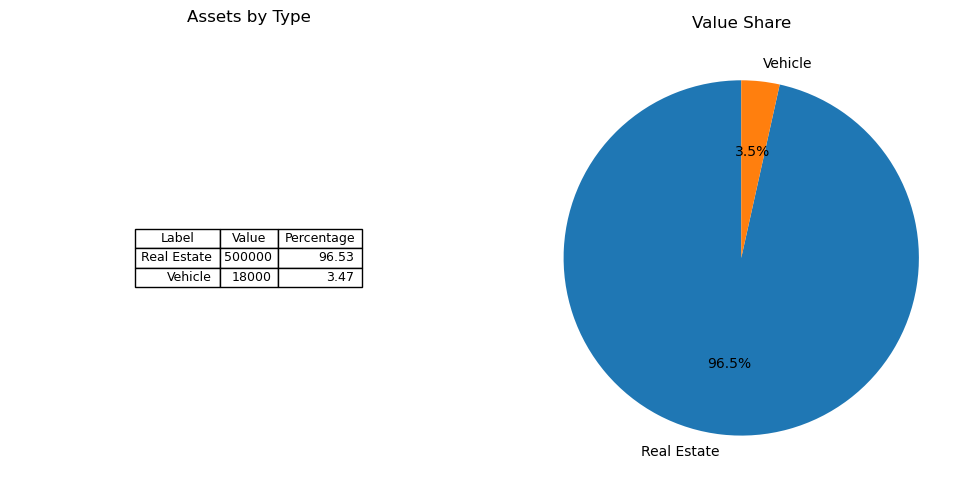

Visualization dataset:
         Label   Value  Percentage
0  Real Estate  500000       96.53
1      Vehicle   18000        3.47


In [28]:
from budget_system.property.asset import Asset, PropertyRegistry
from budget_system.property.asset_utils import (
    summarize_total_value,
    search_assets,
    get_visualization_data
)


print("===== Create PropertyRegistry =====")
reg = PropertyRegistry()
print("Registry initialized.")
print()


print("===== Add some assets =====")
a1 = Asset(name="Family Home",
           asset_type="Real Estate",
           owner="P001",
           current_value=500000,
           date_acquired="2010-05-01")

a2 = Asset(name="Toyota Camry",
           asset_type="Vehicle",
           owner="P002",
           current_value=20000,
           date_acquired="2018-08-15")

a3 = Asset(name="Index Fund",
           asset_type="Investment",
           owner="P001",
           current_value=15000,
           date_acquired="2021-03-10")

reg.add_asset(a1)
reg.add_asset(a2)
reg.add_asset(a3)

print("Assets added:")
for a in reg.assets:
    print(a)
print()


print("===== Update asset value =====")
reg.update_asset_value(a2.asset_id, 18000)
print("Updated:", reg.assets[1])
print()


print("===== Delete an asset =====")
reg.delete_asset(a3.asset_id)
print("Remaining:")
for a in reg.assets:
    print(a)
print()


print("===== Convert to DataFrame =====")
df = reg.to_dataframe()
print(df)
print()


print("===== Summarize total value =====")
summary_df, total = summarize_total_value(reg)
print("Total value:", total)
print(summary_df)
print()


print("===== Search asset by keyword =====")
result_df = search_assets(reg, "Toyota")
print(result_df)
print()


print("===== Visualization data (pie chart + table) =====")
grouped_df = get_visualization_data(reg, group_by="Type")
print("Visualization dataset:")
print(grouped_df)